In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [2]:
df=pd.read_csv('C:/Users/ketak/Desktop/Springboard/capstone ideas/NYSDOH_clean.csv')

In [3]:
df.columns

Index(['Unnamed: 0', 'Unnamed:_0', 'Hospital_Service_Area', 'Hospital_County',
       'Operating_Certificate_Number', 'Permanent_Facility_Id',
       'Facility_Name', 'Age_Group', 'Zip_Code__3_digits', 'Gender', 'Race',
       'Ethnicity', 'Length_of_Stay', 'Type_of_Admission',
       'Patient_Disposition', 'Discharge_Year', 'CCS_Diagnosis_Code',
       'CCS_Diagnosis_Description', 'CCS_Procedure_Code',
       'CCS_Procedure_Description', 'APR_DRG_Code', 'APR_DRG_Description',
       'APR_MDC_Code', 'APR_MDC_Description', 'APR_Severity_of_Illness_Code',
       'APR_Severity_of_Illness_Description', 'APR_Risk_of_Mortality',
       'APR_Medical_Surgical_Description', 'Payment_Typology_1',
       'Payment_Typology_2', 'Payment_Typology_3', 'Birth_Weight',
       'Abortion_Edit_Indicator', 'Emergency_Department_Indicator',
       'Total_Charges', 'Total_Costs',
       'Ratio_of_Total_Costs_to_Total_Charges'],
      dtype='object')

In [4]:
df.drop(columns=['Unnamed:_0'],inplace=True)

In [5]:
# Convert Total Charges from object into float
df['Total_Charges']=df['Total_Charges'].apply(lambda x: float(x.replace(",", "")))

In [6]:
# convert Total Costs from object into float
df['Total_Costs']=df['Total_Costs'].apply(lambda x: float(x.replace(",", "")))

In [7]:
#df.to_csv('NYSDOH_clean2.csv')

In [8]:
# drop APR codes as APR codes are likely not designaed at the time of admission, 
# and are designated for puporses of reimbursement
df_subset=df.drop(df.iloc[:, 19:27], axis = 1)


In [9]:
df_subset.columns

Index(['Unnamed: 0', 'Hospital_Service_Area', 'Hospital_County',
       'Operating_Certificate_Number', 'Permanent_Facility_Id',
       'Facility_Name', 'Age_Group', 'Zip_Code__3_digits', 'Gender', 'Race',
       'Ethnicity', 'Length_of_Stay', 'Type_of_Admission',
       'Patient_Disposition', 'Discharge_Year', 'CCS_Diagnosis_Code',
       'CCS_Diagnosis_Description', 'CCS_Procedure_Code',
       'CCS_Procedure_Description', 'Payment_Typology_1', 'Payment_Typology_2',
       'Payment_Typology_3', 'Birth_Weight', 'Abortion_Edit_Indicator',
       'Emergency_Department_Indicator', 'Total_Charges', 'Total_Costs',
       'Ratio_of_Total_Costs_to_Total_Charges'],
      dtype='object')

In [10]:
df_subset.Discharge_Year.unique()

array([2014], dtype=int64)

In [11]:
# drop discahrge_year as it is the same across all rows 2014
df_subset=df_subset.drop('Discharge_Year',axis=1)

In [12]:
df_subset.Abortion_Edit_Indicator.unique()

array(['N'], dtype=object)

In [13]:
# Abortion related records as the values/records for where there were abortions have been deidentified and will therefore this column is dropped
df_subset=df_subset.drop('Abortion_Edit_Indicator',axis=1)

In [14]:
# drop second unnamed 0
df_subset=df_subset.drop('Unnamed: 0',axis=1)

In [15]:
#df_subset.to_csv('NYSDOH_subset.csv')

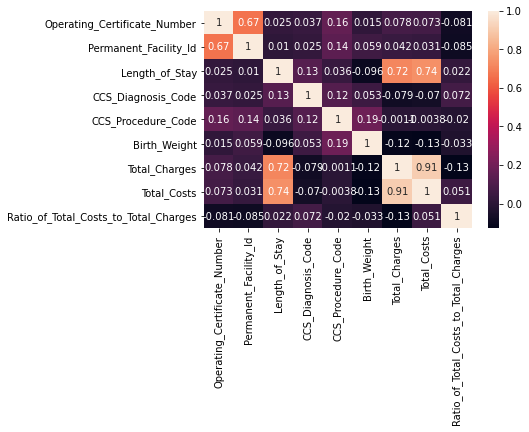

In [16]:
# create a correlation matrix, some of the columns are non ordered data...(operating_certificate_number, permenant_facility_id,diagnosis and procedure codes)
correlation_mat = df_subset.corr()

sns.heatmap(correlation_mat, annot = True)

plt.show()

(211945, 36)

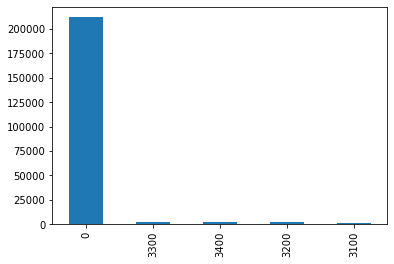

In [116]:
(df['Birth_Weight'].value_counts().head(5)).plot(kind='bar')
# appears that majority of the hospital admissions do not constitue newborns
df[df['Birth_Weight']==0].shape

#1 The correlation is strongest between total costs and total_charges is strong at .91 which makes sense, but this is determined at the end of stay and may not help us predict length of stay, so should we take this into consideration?
#2 length of stay and total_charges and total_costs is at .72 and .74 respectively, this does make sense as a higher length of stay will correspond to increase costs and charges, but again, will the total cost and charge predict length of stay?
#3  lastly operating certficate number and permenant facility id show correlation. The id's are non-ordered , would this correlation then still be relevant?
Which other columns to drop?:
#APR codes:. A higher relative weight is associated with longer length of stay, greater severity of illness, and higher reimbursement. The time of when APR-DRG’s are assigned is unclear. For this reason APR codes will be dropped. More on this in the EDA report
#In the context of which variable will predict length of stay, I am differentiating variables that are assigned at the time of diagnosis (diagnosis or procedure) versus those that are established at the time of discharge. Total charges, total costs, and total cost to charge ratio are identified after length of stay is complete and thus not useful in predicting length of stay, although the converse will hold true.
#Operating_Certificate_Number and Permenant_Facility_Id are greater than 180 unique counts and will serve the same purpose as hospiatl facility name. To focus only on columns of interest we will drop these. 



In [20]:
# create a subset focusing on relevant columns of interest and dropping the rest
df_subset=df_subset.drop(columns=(['Operating_Certificate_Number','Permanent_Facility_Id','Patient_Disposition','Payment_Typology_2','Payment_Typology_3','Birth_Weight','Total_Charges', 'Total_Costs',
       'Ratio_of_Total_Costs_to_Total_Charges','CCS_Diagnosis_Code','CCS_Procedure_Code']),axis=1)

In [21]:
df_subset.columns

Index(['Hospital_Service_Area', 'Hospital_County', 'Facility_Name',
       'Age_Group', 'Zip_Code__3_digits', 'Gender', 'Race', 'Ethnicity',
       'Length_of_Stay', 'Type_of_Admission', 'CCS_Diagnosis_Description',
       'CCS_Procedure_Description', 'Payment_Typology_1',
       'Emergency_Department_Indicator'],
      dtype='object')

(array([2.15751e+05, 1.42340e+04, 3.57600e+03, 1.10500e+03, 5.65000e+02,
        2.97000e+02, 2.02000e+02, 1.10000e+02, 7.00000e+01, 2.37000e+02]),
 array([  1. ,  12.9,  24.8,  36.7,  48.6,  60.5,  72.4,  84.3,  96.2,
        108.1, 120. ]),
 <a list of 10 Patch objects>)

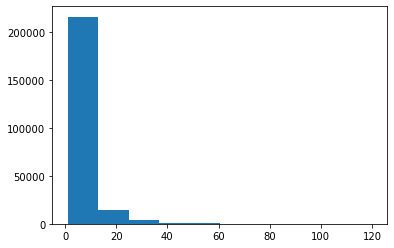

In [22]:
# Target variable is length of stay, univariate data analysis of target

plt.hist(df_subset['Length_of_Stay'])

In [23]:
df_subset['Length_of_Stay'].describe()

count    236147.000000
mean          5.503043
std           8.113239
min           1.000000
25%           2.000000
50%           3.000000
75%           6.000000
max         120.000000
Name: Length_of_Stay, dtype: float64

In [24]:
#define function to plot a bar graph for each column and describe 
def plotbar(x):
    dfh=pd.DataFrame(df_subset.groupby(x).Length_of_Stay.mean(),columns=(x,'Length_of_Stay'))
    dfh=dfh.sort_values('Length_of_Stay')
    dfh.describe()
    dfh.head(20).plot(kind='barh')
    dfh.tail(20).plot(kind='barh')                 
    print(dfh.describe())

       Length_of_Stay
count      258.000000
mean         5.749225
std          3.651308
min          1.000000
25%          3.451301
50%          4.885802
75%          6.817384
max         32.909091


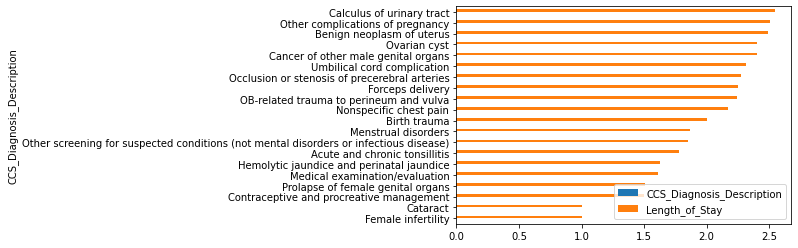

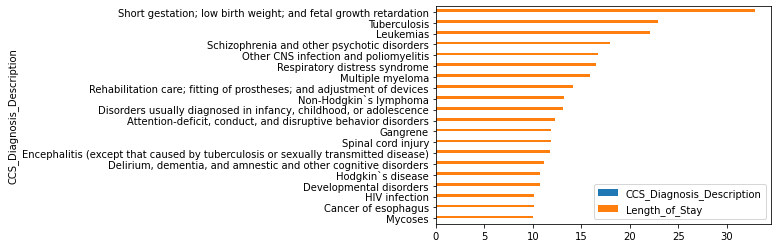

In [25]:
plotbar('CCS_Diagnosis_Description')

In [36]:
# There are 258 different types of diagnosis categories.Lets take a look at the top 5
common_diag=df_subset[df_subset.groupby('CCS_Diagnosis_Description')['CCS_Diagnosis_Description'].transform('size') > 5000]
common_diag['CCS_Diagnosis_Description'].unique().shape
common_diag['CCS_Diagnosis_Description'].unique()

array(['Osteoarthritis', 'Septicemia (except in labor)', 'Liveborn',
       'Congestive heart failure; nonhypertensive', 'Mood disorders'],
      dtype=object)

[None, None, None, None, None, None, None, None, None, None]

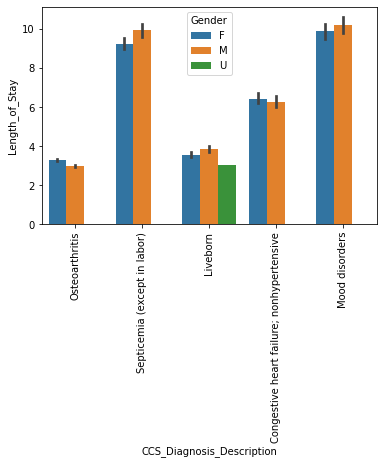

In [42]:
# let us see if gender has an impact on length of stay in each of the major diagnosis description category
ax=sns.barplot(x='CCS_Diagnosis_Description',y='Length_of_Stay',hue='Gender',data=common_diag)
plt.setp(ax.get_xticklabels(), rotation=90)

[None, None, None, None, None, None, None, None, None, None]

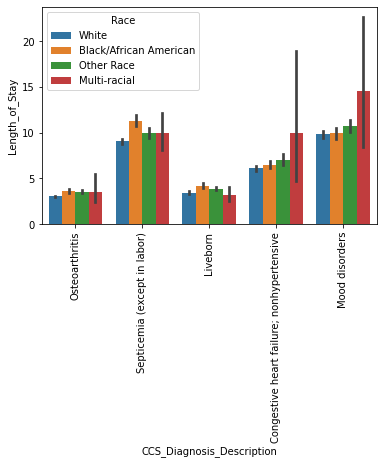

In [43]:
# lets take a look at Race within each diagnistic category
ax=sns.barplot(x='CCS_Diagnosis_Description',y='Length_of_Stay',hue='Race',data=common_diag)
plt.setp(ax.get_xticklabels(), rotation=90)

It appears that African-Americans have a a slighter higher length of stay in the Sepetecemia group, and multiracial category seems to have a higher length of stay for Congestive heart failiure and mood disorders. Due to lack of seperate groups for Asians, South-Asians and Hispanic population we can assume they fall into 'other' or 'multiracial'

[None, None, None, None, None, None, None, None, None, None]

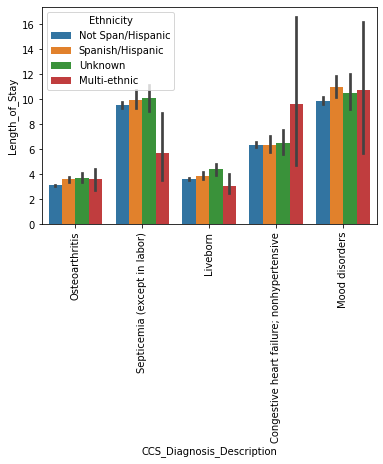

In [44]:
ax=sns.barplot(x='CCS_Diagnosis_Description',y='Length_of_Stay',hue='Ethnicity',data=common_diag)
plt.setp(ax.get_xticklabels(), rotation=90)

Multiethnic groups seem to have the higher length of stay among condestive heart failiure admissions whereas all other categories of admission seem to have similar length of stays in diffrent ethnicities with the non-hipsanic on the slightly lower side

       Length_of_Stay
count       10.000000
mean         5.468769
std          1.452166
min          4.148017
25%          4.362698
50%          4.974255
75%          6.175157
max          8.742857


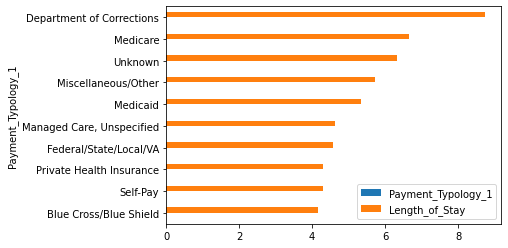

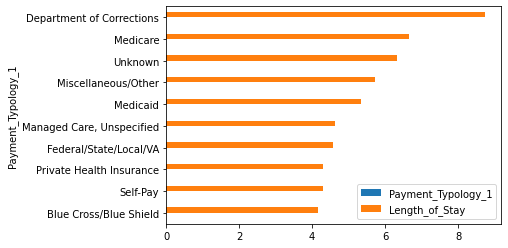

In [45]:
#Next lets take a look at payment typology 1 or the primary insurance of the patient to see if this may play a role in length of stay
plotbar('Payment_Typology_1')

In [69]:
#looks like there are 10 different types of payment typology, lets narrow down the top 3 most frequently used
common_pt=df_subset[df_subset.groupby('Payment_Typology_1')['Payment_Typology_1'].transform('size') > 30000]
common_pt['Payment_Typology_1'].unique().shape


(3,)

In [70]:
common_pt['Payment_Typology_1'].unique()

array(['Medicaid', 'Medicare', 'Private Health Insurance'], dtype=object)

In [71]:
# lets create a subset of our common diagnosis dataframe where the most common 3 insurances were used: cdp
cdp=common_diag.loc[(common_diag['Payment_Typology_1']=='Medicaid')|(common_diag['Payment_Typology_1']=='Medicare')|(common_diag['Payment_Typology_1']=='Medicaid')|(common_diag['Payment_Typology_1']=='Private Health Insurance')]

[None, None, None, None, None, None, None, None, None, None]

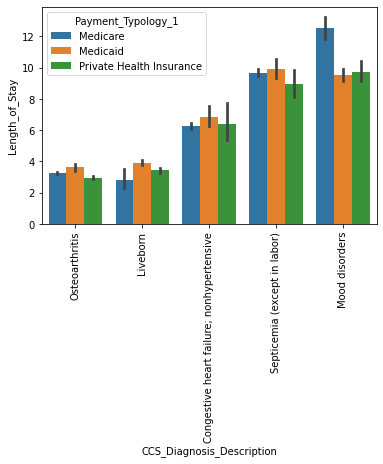

In [74]:
# Let us see the distribution of the most common diagnosis, variability with payment typology for length of stay
ax=sns.barplot(x='CCS_Diagnosis_Description',y='Length_of_Stay',hue='Payment_Typology_1',data=cdp)
plt.setp(ax.get_xticklabels(), rotation=90)

In [77]:
cdp.head()

,Hospital_Service_Area,Hospital_County,Facility_Name,Age_Group,Zip_Code__3_digits,Gender,Race,Ethnicity,Length_of_Stay,Type_of_Admission,CCS_Diagnosis_Description,CCS_Procedure_Description,Payment_Typology_1,Emergency_Department_Indicator
9,Western NY,Chautauqua,Woman's Christian Association,50 to 69,147,F,White,Not Span/Hispanic,2.0,Elective,Osteoarthritis,"HIP REPLACEMENT,TOT/PRT",Medicare,N
20,Western NY,Chautauqua,Brooks Memorial Hospital,0 to 17,140,F,White,Spanish/Hispanic,1.0,Newborn,Liveborn,NO PROC,Medicaid,N
24,Western NY,Chautauqua,Woman's Christian Association,50 to 69,147,F,White,Not Span/Hispanic,4.0,Elective,Osteoarthritis,"HIP REPLACEMENT,TOT/PRT",Medicaid,N
43,Western NY,Chautauqua,TLC Health Network Lake Shore Hospital,70 or Older,140,F,White,Not Span/Hispanic,4.0,Emergency,Congestive heart failure; nonhypertensive,BLOOD TRANSFUSION,Medicare,Y
50,Western NY,Erie,Buffalo General Medical Center,50 to 69,142,F,Black/African American,Not Span/Hispanic,3.0,Emergency,Congestive heart failure; nonhypertensive,NO PROC,Medicare,Y


       Length_of_Stay
count       57.000000
mean         4.750074
std          0.830934
min          2.809524
25%          4.065789
50%          4.906942
75%          5.389008
max          6.784757


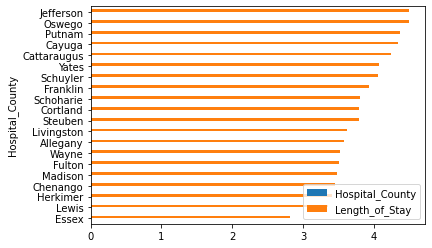

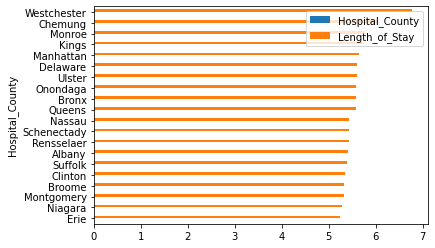

In [24]:
# look at each column of interest in the df_subset
plotbar('Hospital_County')

The lowest mean length of stay is in Essex county at liitle more than 2.5 days and the most mean length of stay is at Westchester county more than 6.5 days

       Length_of_Stay
count        6.000000
mean         5.273317
std          0.993654
min          3.703994
25%          4.777413
50%          5.439003
75%          6.054103
max          6.241883


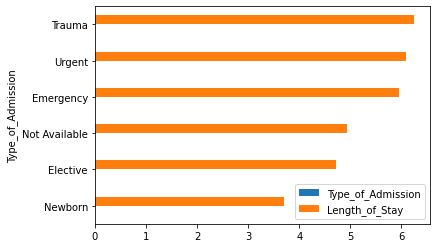

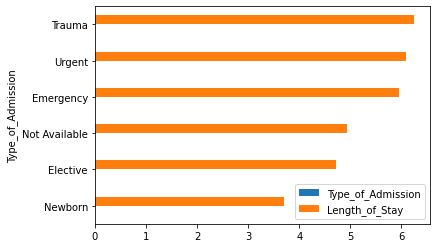

In [25]:
plotbar('Type_of_Admission')

       Length_of_Stay
count        8.000000
mean         5.380569
std          0.279931
min          5.068794
25%          5.162208
50%          5.326472
75%          5.558734
max          5.869101


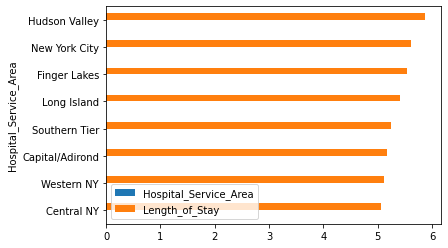

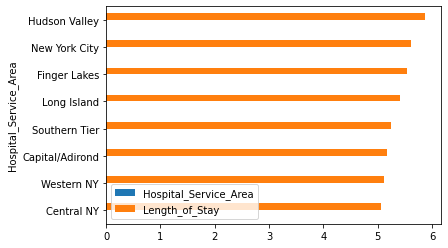

In [26]:
plotbar('Hospital_Service_Area')

       Length_of_Stay
count      228.000000
mean         6.178128
std          5.008153
min          2.000000
25%          4.228729
50%          4.973802
75%          6.186719
max         54.916667


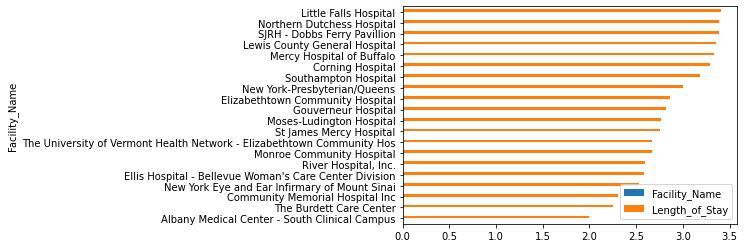

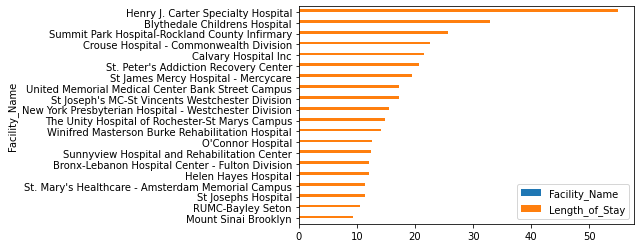

In [30]:
plotbar('Facility_Name')

       Length_of_Stay
count        8.000000
mean         5.380569
std          0.279931
min          5.068794
25%          5.162208
50%          5.326472
75%          5.558734
max          5.869101


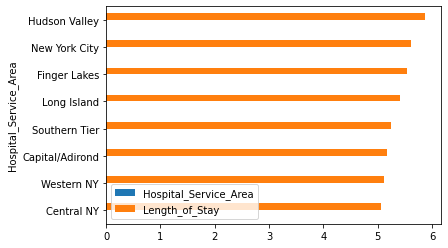

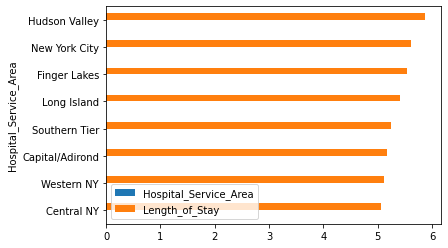

In [36]:
plotbar('Hospital_Service_Area')

       Length_of_Stay
count        5.000000
mean         5.234384
std          1.039617
min          3.992414
25%          4.607939
50%          4.983031
75%          6.096282
max          6.492256


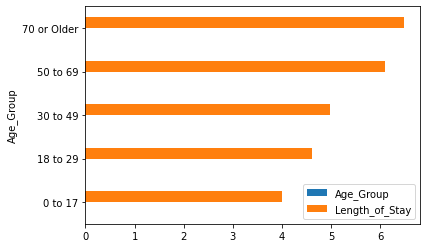

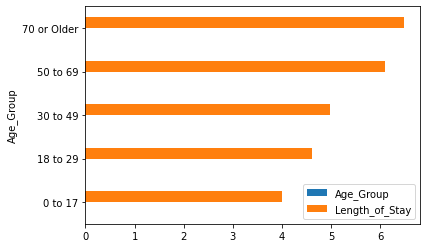

In [78]:
plotbar('Age_Group')

       Length_of_Stay
count       51.000000
mean         5.444038
std          0.490541
min          4.688165
25%          5.122078
50%          5.347367
75%          5.724928
max          7.015134


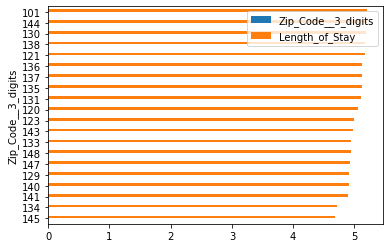

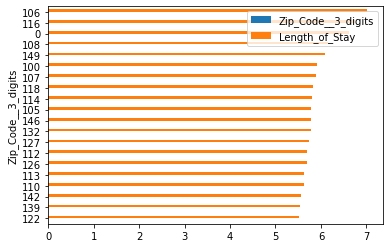

In [79]:
plotbar('Zip_Code__3_digits')

       Length_of_Stay
count        3.000000
mean         4.701916
std          1.533513
min          3.000000
25%          4.064733
50%          5.129465
75%          5.552873
max          5.976281


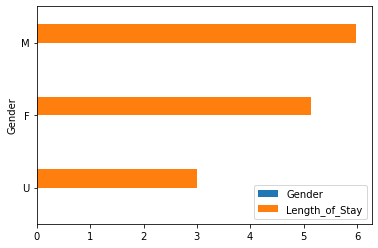

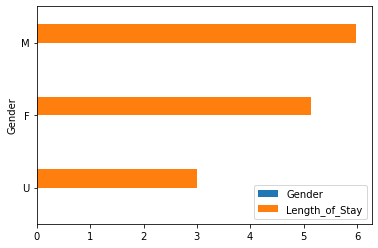

In [80]:
plotbar('Gender')

       Length_of_Stay
count        4.000000
mean         5.610376
std          0.410515
min          5.189697
25%          5.359306
50%          5.554267
75%          5.805337
max          6.143272


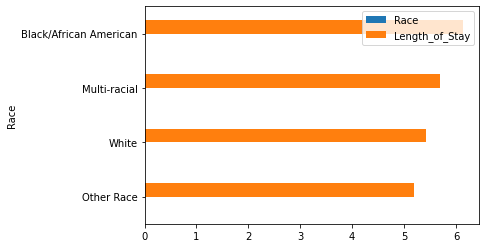

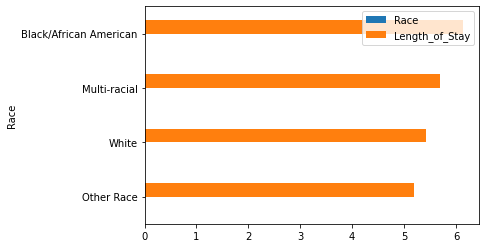

In [81]:
plotbar('Race')

       Length_of_Stay
count        4.000000
mean         5.145173
std          0.517607
min          4.471805
25%          4.872897
50%          5.265194
75%          5.537470
max          5.578497


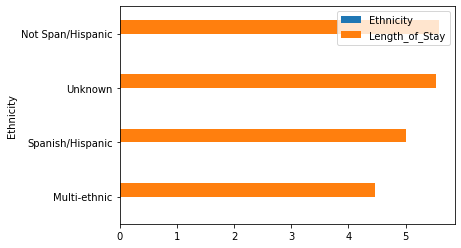

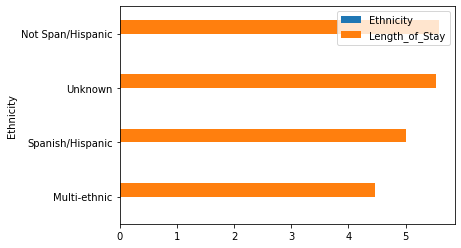

In [82]:
plotbar('Ethnicity')

       Length_of_Stay
count        6.000000
mean         5.273317
std          0.993654
min          3.703994
25%          4.777413
50%          5.439003
75%          6.054103
max          6.241883


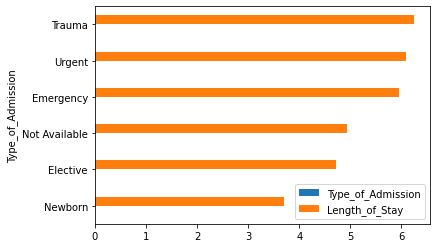

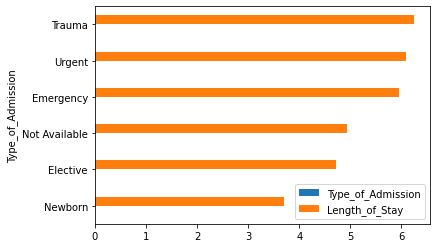

In [83]:
plotbar('Type_of_Admission')

       Length_of_Stay
count      227.000000
mean         6.793957
std          4.900731
min          1.543478
25%          4.041769
50%          5.726257
75%          8.191443
max         41.072193


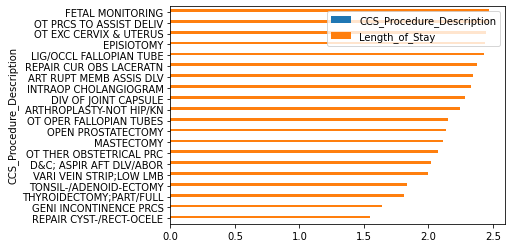

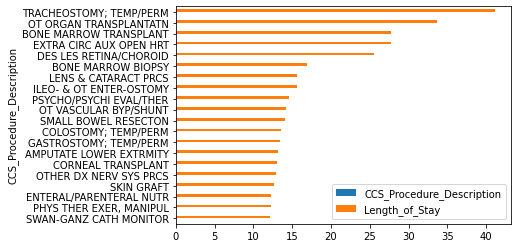

In [86]:
plotbar('CCS_Procedure_Description')

In [112]:
common_proc=df_subset[df_subset.groupby('CCS_Procedure_Description')['CCS_Procedure_Description'].transform('size') > 3200]

In [113]:
common_proc['CCS_Procedure_Description'].unique().shape

(15,)

In [114]:
common_proc['CCS_Procedure_Description'].unique()

array(['NO PROC', 'OT PRCS TO ASSIST DELIV', 'RESP INTUB/MECH VENTIL',
       'BLOOD TRANSFUSION', 'CESAREAN SECTION', 'ARTHROPLASTY KNEE',
       'PROPHYLACTIC VAC/INOCUL', 'PSYCHO/PSYCHI EVAL/THER',
       'ALCO/DRUG REHAB/DETOX', 'REPAIR CUR OBS LACERATN', 'CIRCUMCISION',
       'UP GASTRO ENDOSC/BIOPSY', 'OTHER THERAPEUTIC PRCS',
       'OPHTHALM-/OT-OLOGIC DX', 'OTHER RESP THERAPY'], dtype=object)

In [ ]:
Next Steps???:
    Picking which columns to focus on, hoe do I decided this? do I need to see if the stadnard deviation for length of stay for each column is statistically significant?
    From each columns: focus on a few subcategories and not all 250+
    Transposing the dataframe?
    Should I do the  one-hot encode my categoricalor binarise columns, there are multiple categories, should I pick the most commonly occuring  or by most variation high/low of length of stay